# **ANALYSIS OF SALES DATA FROM AN E-COMMERCE.**

In [3]:
pip install pyarrow

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.2f}'.format

## **ENTENDIENDO EL DOMINIO DEL DATASET.**

In [7]:
df = pd.read_parquet('data-ecomm-10-19-smallsampled.parquet')

In [8]:
#Visualization of the dataset.
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
39054315,2019-10-29 07:06:41 UTC,view,1004767,2053013555631882655,electronics.smartphone,samsung,243.22,564343135,76be743b-f5cd-47a2-82eb-b489597df6ba
2640418,2019-10-03 06:05:30 UTC,view,26020177,2053013562644759347,None,None,9.05,529412421,0ee743f2-1a41-4e6f-8d8e-cd38135032a0
24303444,2019-10-18 14:21:55 UTC,view,1307059,2053013558920217191,computers.notebook,apple,1569.92,549727626,022640cb-f45a-4e76-9ade-3eeec65d7837
16337102,2019-10-13 08:46:22 UTC,view,12709948,2053013553559896355,None,triangle,36.94,550305198,56ef2383-4c9d-4475-adcd-d4eeb4205fde
41227753,2019-10-31 02:05:01 UTC,view,1005160,2053013555631882655,electronics.smartphone,xiaomi,212.12,535374900,a4ee5bfa-3824-4f66-87fb-0d0ae358f307


In [9]:
#Number of rows and columns, respectively.
df.shape

(6084217, 9)

In [10]:
#Data type of each column.
df.dtypes 

event_time        object
event_type        object
product_id         int64
category_id        int64
category_code     object
brand             object
price            float64
user_id            int64
user_session      object
dtype: object

In [11]:
#Number of unique categories offered.
len(df.category_code.unique())

127

In [12]:
#Number of unique products available.
len(df.product_id.unique())

128487

In [13]:
#Number of unique subcategories available.
len(df.category_id.unique())

614

In [14]:
#Number of unique brands available.
len(df.brand.unique())

3172

In [15]:
#Number of unique customers.
len(df.user_id.unique())

1028553

To understand **how the business is performing**, we want to identify which products are the most viewed and which ones are the most purchased.


In [16]:
df['event_type'].value_counts(normalize = True)

view       0.92
purchase   0.04
cart       0.04
Name: event_type, dtype: float64

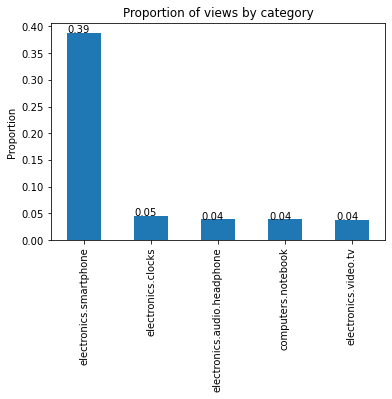

In [20]:
vistas = df[df['event_type']=='view']['category_code'].value_counts(normalize = True)[:5].plot.bar(ylabel= 'Proportion', title='Proportion of views by category')
plt.ticklabel_format(style="plain", axis="y")
for p in vistas.patches:
    vistas.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))

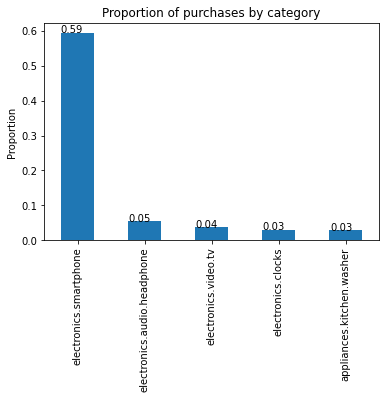

In [21]:
compras = df[df['event_type']=='purchase']['category_code'].value_counts(normalize = True)[:5].plot.bar(ylabel= 'Proportion', title='Proportion of purchases by category')
plt.ticklabel_format(style="plain", axis="y")
for p in compras.patches:
    compras.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))

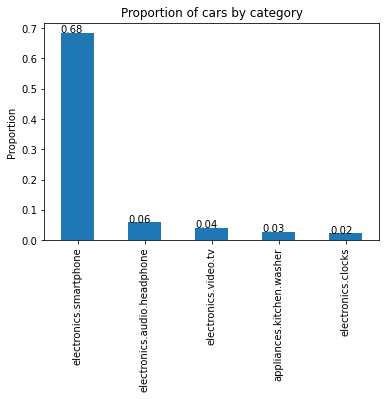

In [22]:
carros = df[df['event_type']=='cart']['category_code'].value_counts(normalize = True)[:5].plot.bar(ylabel= 'Proportion', title='Proportion of cars by category')
plt.ticklabel_format(style="plain", axis="y")
for p in carros.patches:
    carros.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))

The atypical case of **Notebooks** is generated: it appears within the most viewed categories but not within the most purchased categories. 
We will try to corroborate this.

In [23]:
df_categories = df['category_code'].str.split('.',expand=True)
df_categories.columns = ['N0','N1','N2','N3']

In [24]:
df_categories

,N0,N1,N2,N3
39054315,electronics,smartphone,None,None
2640418,None,None,None,None
24303444,computers,notebook,None,None
16337102,None,None,None,None
41227753,electronics,smartphone,None,None
...,...,...,...,...
42448589,None,None,None,None
42448614,electronics,audio,subwoofer,None
42448669,electronics,audio,subwoofer,None
42448734,None,None,None,None


In [25]:
df = pd.concat([df,df_categories],axis=1)

In [26]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,N0,N1,N2,N3
39054315,2019-10-29 07:06:41 UTC,view,1004767,2053013555631882655,electronics.smartphone,samsung,243.22,564343135,76be743b-f5cd-47a2-82eb-b489597df6ba,electronics,smartphone,None,None
2640418,2019-10-03 06:05:30 UTC,view,26020177,2053013562644759347,None,None,9.05,529412421,0ee743f2-1a41-4e6f-8d8e-cd38135032a0,None,None,None,None
24303444,2019-10-18 14:21:55 UTC,view,1307059,2053013558920217191,computers.notebook,apple,1569.92,549727626,022640cb-f45a-4e76-9ade-3eeec65d7837,computers,notebook,None,None
16337102,2019-10-13 08:46:22 UTC,view,12709948,2053013553559896355,None,triangle,36.94,550305198,56ef2383-4c9d-4475-adcd-d4eeb4205fde,None,None,None,None
41227753,2019-10-31 02:05:01 UTC,view,1005160,2053013555631882655,electronics.smartphone,xiaomi,212.12,535374900,a4ee5bfa-3824-4f66-87fb-0d0ae358f307,electronics,smartphone,None,None


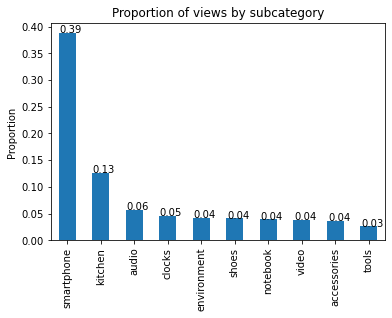

In [27]:
vistas_2 = df[df['event_type']=='view']['N1'].value_counts(normalize = True)[:10].plot.bar(ylabel= 'Proportion', title='Proportion of views by subcategory')
plt.ticklabel_format(style="plain", axis="y")
for p in vistas_2.patches:
    vistas_2.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))

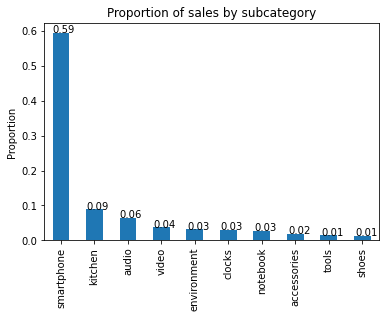

In [28]:
compras_2 = df[df['event_type']=='purchase']['N1'].value_counts(normalize = True)[:10].plot.bar(ylabel= 'Proportion', title='Proportion of sales by subcategory')
plt.ticklabel_format(style="plain", axis="y")
for p in compras_2.patches:
    compras_2.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))

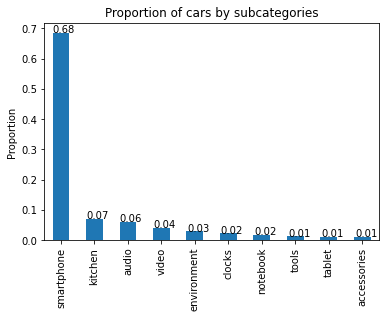

In [29]:
carros_2 = df[df['event_type']=='cart']['N1'].value_counts(normalize = True)[:10].plot.bar(ylabel= 'Proportion', title='Proportion of cars by subcategories')
plt.ticklabel_format(style="plain", axis="y")
for p in carros_2.patches:
    carros_2.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))

When grouping by subcategories, the atypical case disappears. **Notebook** purchases are in line with their views.


### **Assumption:** The company's objective is to increase the sales of Notebooks.

## **Therefore, we will work only with the 'computers.notebook' category.** 

In [30]:
df_notebook=df[df['category_code']=='computers.notebook'].copy()
df_notebook= df_notebook.reset_index()

## **DATA CLEANING**

In [31]:
df_notebook = df_notebook.drop(['user_session'], axis=1)
df_notebook

,index,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,N0,N1,N2,N3
0,24303444,2019-10-18 14:21:55 UTC,view,1307059,2053013558920217191,computers.notebook,apple,1569.92,549727626,computers,notebook,None,None
1,5398322,2019-10-05 08:20:00 UTC,view,1307344,2053013558920217191,computers.notebook,asus,540.53,549734639,computers,notebook,None,None
2,12732638,2019-10-10 19:00:37 UTC,view,1306691,2053013558920217191,computers.notebook,lenovo,373.06,513074495,computers,notebook,None,None
3,10624462,2019-10-09 08:19:46 UTC,view,1306686,2053013558920217191,computers.notebook,prestigio,257.15,558355847,computers,notebook,None,None
4,2388466,2019-10-02 19:49:09 UTC,view,1307293,2053013558920217191,computers.notebook,msi,866.71,534449314,computers,notebook,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156125,42446530,2019-10-31 23:41:58 UTC,view,1307545,2053013558920217191,computers.notebook,lenovo,257.15,546977150,computers,notebook,None,None
156126,42446696,2019-10-31 23:43:25 UTC,purchase,1307545,2053013558920217191,computers.notebook,lenovo,257.15,546977150,computers,notebook,None,None
156127,42446757,2019-10-31 23:43:52 UTC,view,1307545,2053013558920217191,computers.notebook,lenovo,257.15,546977150,computers,notebook,None,None
156128,42446833,2019-10-31 23:44:30 UTC,view,1307545,2053013558920217191,computers.notebook,lenovo,257.15,546977150,computers,notebook,None,None


## **DATA TRANSFORMATION.**

In [32]:
df_notebook['event_time']= pd.to_datetime(df_notebook['event_time'], format='%Y-%m-%d %H:%M:%S UTC')

In [33]:
df_notebook['Time']= df_notebook['event_time'].dt.time
df_notebook['DayOfMonth']=df_notebook['event_time'].dt.day
df_notebook['Month']=df_notebook['event_time'].dt.month
df_notebook['Year']=df_notebook['event_time'].dt.year
df_notebook['Day']=df_notebook['event_time'].dt.day_name()
df_notebook['Hour']=df_notebook['event_time'].dt.hour
df_notebook

,index,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,N0,N1,N2,N3,Time,DayOfMonth,Month,Year,Day,Hour
0,24303444,2019-10-18 14:21:55,view,1307059,2053013558920217191,computers.notebook,apple,1569.92,549727626,computers,notebook,None,None,14:21:55,18,10,2019,Friday,14
1,5398322,2019-10-05 08:20:00,view,1307344,2053013558920217191,computers.notebook,asus,540.53,549734639,computers,notebook,None,None,08:20:00,5,10,2019,Saturday,8
2,12732638,2019-10-10 19:00:37,view,1306691,2053013558920217191,computers.notebook,lenovo,373.06,513074495,computers,notebook,None,None,19:00:37,10,10,2019,Thursday,19
3,10624462,2019-10-09 08:19:46,view,1306686,2053013558920217191,computers.notebook,prestigio,257.15,558355847,computers,notebook,None,None,08:19:46,9,10,2019,Wednesday,8
4,2388466,2019-10-02 19:49:09,view,1307293,2053013558920217191,computers.notebook,msi,866.71,534449314,computers,notebook,None,None,19:49:09,2,10,2019,Wednesday,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156125,42446530,2019-10-31 23:41:58,view,1307545,2053013558920217191,computers.notebook,lenovo,257.15,546977150,computers,notebook,None,None,23:41:58,31,10,2019,Thursday,23
156126,42446696,2019-10-31 23:43:25,purchase,1307545,2053013558920217191,computers.notebook,lenovo,257.15,546977150,computers,notebook,None,None,23:43:25,31,10,2019,Thursday,23
156127,42446757,2019-10-31 23:43:52,view,1307545,2053013558920217191,computers.notebook,lenovo,257.15,546977150,computers,notebook,None,None,23:43:52,31,10,2019,Thursday,23
156128,42446833,2019-10-31 23:44:30,view,1307545,2053013558920217191,computers.notebook,lenovo,257.15,546977150,computers,notebook,None,None,23:44:30,31,10,2019,Thursday,23


## **CREATION OF NEW COLUMNS.**

In [34]:
df_notebook['event_type_ID'] = 0
df_notebook

,index,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,N0,N1,N2,N3,Time,DayOfMonth,Month,Year,Day,Hour,event_type_ID
0,24303444,2019-10-18 14:21:55,view,1307059,2053013558920217191,computers.notebook,apple,1569.92,549727626,computers,notebook,None,None,14:21:55,18,10,2019,Friday,14,0
1,5398322,2019-10-05 08:20:00,view,1307344,2053013558920217191,computers.notebook,asus,540.53,549734639,computers,notebook,None,None,08:20:00,5,10,2019,Saturday,8,0
2,12732638,2019-10-10 19:00:37,view,1306691,2053013558920217191,computers.notebook,lenovo,373.06,513074495,computers,notebook,None,None,19:00:37,10,10,2019,Thursday,19,0
3,10624462,2019-10-09 08:19:46,view,1306686,2053013558920217191,computers.notebook,prestigio,257.15,558355847,computers,notebook,None,None,08:19:46,9,10,2019,Wednesday,8,0
4,2388466,2019-10-02 19:49:09,view,1307293,2053013558920217191,computers.notebook,msi,866.71,534449314,computers,notebook,None,None,19:49:09,2,10,2019,Wednesday,19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156125,42446530,2019-10-31 23:41:58,view,1307545,2053013558920217191,computers.notebook,lenovo,257.15,546977150,computers,notebook,None,None,23:41:58,31,10,2019,Thursday,23,0
156126,42446696,2019-10-31 23:43:25,purchase,1307545,2053013558920217191,computers.notebook,lenovo,257.15,546977150,computers,notebook,None,None,23:43:25,31,10,2019,Thursday,23,0
156127,42446757,2019-10-31 23:43:52,view,1307545,2053013558920217191,computers.notebook,lenovo,257.15,546977150,computers,notebook,None,None,23:43:52,31,10,2019,Thursday,23,0
156128,42446833,2019-10-31 23:44:30,view,1307545,2053013558920217191,computers.notebook,lenovo,257.15,546977150,computers,notebook,None,None,23:44:30,31,10,2019,Thursday,23,0


In [35]:
for i in df_notebook.index.to_list():
    if df_notebook.loc[i, 'event_type'] == 'view':
        df_notebook.loc[i, 'event_type_ID']= 0
    elif df_notebook.loc[i, 'event_type'] == 'cart':
        df_notebook.loc[i, 'event_type_ID']= 1
    else:
        df_notebook.loc[i, 'event_type_ID']= 2

In [36]:
df_notebook

,index,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,N0,N1,N2,N3,Time,DayOfMonth,Month,Year,Day,Hour,event_type_ID
0,24303444,2019-10-18 14:21:55,view,1307059,2053013558920217191,computers.notebook,apple,1569.92,549727626,computers,notebook,None,None,14:21:55,18,10,2019,Friday,14,0
1,5398322,2019-10-05 08:20:00,view,1307344,2053013558920217191,computers.notebook,asus,540.53,549734639,computers,notebook,None,None,08:20:00,5,10,2019,Saturday,8,0
2,12732638,2019-10-10 19:00:37,view,1306691,2053013558920217191,computers.notebook,lenovo,373.06,513074495,computers,notebook,None,None,19:00:37,10,10,2019,Thursday,19,0
3,10624462,2019-10-09 08:19:46,view,1306686,2053013558920217191,computers.notebook,prestigio,257.15,558355847,computers,notebook,None,None,08:19:46,9,10,2019,Wednesday,8,0
4,2388466,2019-10-02 19:49:09,view,1307293,2053013558920217191,computers.notebook,msi,866.71,534449314,computers,notebook,None,None,19:49:09,2,10,2019,Wednesday,19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156125,42446530,2019-10-31 23:41:58,view,1307545,2053013558920217191,computers.notebook,lenovo,257.15,546977150,computers,notebook,None,None,23:41:58,31,10,2019,Thursday,23,0
156126,42446696,2019-10-31 23:43:25,purchase,1307545,2053013558920217191,computers.notebook,lenovo,257.15,546977150,computers,notebook,None,None,23:43:25,31,10,2019,Thursday,23,2
156127,42446757,2019-10-31 23:43:52,view,1307545,2053013558920217191,computers.notebook,lenovo,257.15,546977150,computers,notebook,None,None,23:43:52,31,10,2019,Thursday,23,0
156128,42446833,2019-10-31 23:44:30,view,1307545,2053013558920217191,computers.notebook,lenovo,257.15,546977150,computers,notebook,None,None,23:44:30,31,10,2019,Thursday,23,0


## **DATA CLEANING.**

In [37]:
#We will only keep the records from October 2019.
df_notebook_OCT= df_notebook[(df_notebook['Month']==10) & (df_notebook['Year']==2019)].copy() 
df_notebook_OCT.reset_index()

,level_0,index,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,...,N1,N2,N3,Time,DayOfMonth,Month,Year,Day,Hour,event_type_ID
0,0,24303444,2019-10-18 14:21:55,view,1307059,2053013558920217191,computers.notebook,apple,1569.92,549727626,...,notebook,None,None,14:21:55,18,10,2019,Friday,14,0
1,1,5398322,2019-10-05 08:20:00,view,1307344,2053013558920217191,computers.notebook,asus,540.53,549734639,...,notebook,None,None,08:20:00,5,10,2019,Saturday,8,0
2,2,12732638,2019-10-10 19:00:37,view,1306691,2053013558920217191,computers.notebook,lenovo,373.06,513074495,...,notebook,None,None,19:00:37,10,10,2019,Thursday,19,0
3,3,10624462,2019-10-09 08:19:46,view,1306686,2053013558920217191,computers.notebook,prestigio,257.15,558355847,...,notebook,None,None,08:19:46,9,10,2019,Wednesday,8,0
4,4,2388466,2019-10-02 19:49:09,view,1307293,2053013558920217191,computers.notebook,msi,866.71,534449314,...,notebook,None,None,19:49:09,2,10,2019,Wednesday,19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156125,156125,42446530,2019-10-31 23:41:58,view,1307545,2053013558920217191,computers.notebook,lenovo,257.15,546977150,...,notebook,None,None,23:41:58,31,10,2019,Thursday,23,0
156126,156126,42446696,2019-10-31 23:43:25,purchase,1307545,2053013558920217191,computers.notebook,lenovo,257.15,546977150,...,notebook,None,None,23:43:25,31,10,2019,Thursday,23,2
156127,156127,42446757,2019-10-31 23:43:52,view,1307545,2053013558920217191,computers.notebook,lenovo,257.15,546977150,...,notebook,None,None,23:43:52,31,10,2019,Thursday,23,0
156128,156128,42446833,2019-10-31 23:44:30,view,1307545,2053013558920217191,computers.notebook,lenovo,257.15,546977150,...,notebook,None,None,23:44:30,31,10,2019,Thursday,23,0


## **DOMAIN UNDERSTANDING**. 
**We seek to answer:** Can a user make purchases without first viewing the product or adding it to the cart?

In [38]:
df_notebook_OCT[(df_notebook_OCT['user_id']==546977150) & (df_notebook_OCT['product_id']==1307545)]

,index,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,N0,N1,N2,N3,Time,DayOfMonth,Month,Year,Day,Hour,event_type_ID
156123,42446412,2019-10-31 23:41:03,view,1307545,2053013558920217191,computers.notebook,lenovo,257.15,546977150,computers,notebook,None,None,23:41:03,31,10,2019,Thursday,23,0
156125,42446530,2019-10-31 23:41:58,view,1307545,2053013558920217191,computers.notebook,lenovo,257.15,546977150,computers,notebook,None,None,23:41:58,31,10,2019,Thursday,23,0
156126,42446696,2019-10-31 23:43:25,purchase,1307545,2053013558920217191,computers.notebook,lenovo,257.15,546977150,computers,notebook,None,None,23:43:25,31,10,2019,Thursday,23,2
156127,42446757,2019-10-31 23:43:52,view,1307545,2053013558920217191,computers.notebook,lenovo,257.15,546977150,computers,notebook,None,None,23:43:52,31,10,2019,Thursday,23,0
156128,42446833,2019-10-31 23:44:30,view,1307545,2053013558920217191,computers.notebook,lenovo,257.15,546977150,computers,notebook,None,None,23:44:30,31,10,2019,Thursday,23,0


In [39]:
df_notebook_OCT[(df_notebook_OCT['user_id']==525574339) & (df_notebook_OCT['product_id']==1307073)]

,index,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,N0,N1,N2,N3,Time,DayOfMonth,Month,Year,Day,Hour,event_type_ID
12,24741545,2019-10-18 18:54:44,cart,1307073,2053013558920217191,computers.notebook,acer,694.71,525574339,computers,notebook,None,None,18:54:44,18,10,2019,Friday,18,1
50791,24741688,2019-10-18 18:54:51,view,1307073,2053013558920217191,computers.notebook,acer,694.71,525574339,computers,notebook,None,None,18:54:51,18,10,2019,Friday,18,0


**Answer:** A product can go from view to purchase, or from view to cart and then from cart to purchase.

**We aim to answer:** How many users have abandoned notebooks in the cart during the month of October?

In [45]:
tablaCart= df_notebook_OCT[df_notebook_OCT['event_type']=='cart'][['user_id','product_id','event_type', 'brand']].copy()
tablaPurchase= df_notebook_OCT[df_notebook_OCT['event_type']=='purchase'][['user_id','product_id','event_type','brand']].copy()
tablaCartXPurchase = tablaCart.append(tablaPurchase).reset_index().drop(columns='index',axis=1)
tablaCartXPurchase= tablaCartXPurchase.drop_duplicates(subset=['user_id','product_id'])
tablaCartXPurchase.drop(tablaCartXPurchase[tablaCartXPurchase['event_type']=='purchase'].index,inplace=True)
cantUserAbandCart= len(tablaCartXPurchase)
totalUsuarios= len(df_notebook_OCT['user_id'].unique())
print(f'{cantUserAbandCart} users abandoned the cart out of a total of {totalUsuarios} users');

2278 users abandoned the cart out of a total of 37269 users


<ipython-input-45-ac84e6b934c8>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tablaCartXPurchase = tablaCart.append(tablaPurchase).reset_index().drop(columns='index',axis=1)


**We also want to know:** What have been the main notebook brands that have not been purchased by users?

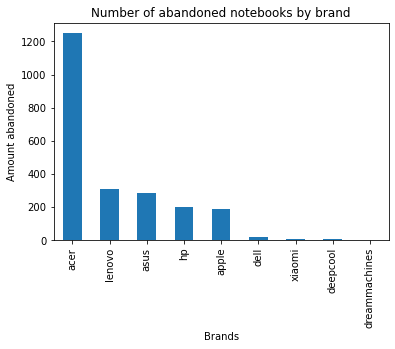

In [47]:
tablaCartXPurchase['brand'].value_counts().plot.bar(ylabel='Amount abandoned', xlabel='Brands', title='Number of abandoned notebooks by brand');

## **DUPLICATE CLEANUP**

In [48]:
df_notebook = df_notebook.drop_duplicates()

In [50]:
#We reordered the columns.
df_notebook.reindex(columns=[ 'user_id', 'event_time', 
       'Year','Month', 'DayOfMonth','Day', 'Time', 'event_type','event_type_ID', 'product_id', 'category_id',
       'category_code', 'brand', 'price'])                                           

,user_id,event_time,Year,Month,DayOfMonth,Day,Time,event_type,event_type_ID,product_id,category_id,category_code,brand,price
0,549727626,2019-10-18 14:21:55,2019,10,18,Friday,14:21:55,view,0,1307059,2053013558920217191,computers.notebook,apple,1569.92
1,549734639,2019-10-05 08:20:00,2019,10,5,Saturday,08:20:00,view,0,1307344,2053013558920217191,computers.notebook,asus,540.53
2,513074495,2019-10-10 19:00:37,2019,10,10,Thursday,19:00:37,view,0,1306691,2053013558920217191,computers.notebook,lenovo,373.06
3,558355847,2019-10-09 08:19:46,2019,10,9,Wednesday,08:19:46,view,0,1306686,2053013558920217191,computers.notebook,prestigio,257.15
4,534449314,2019-10-02 19:49:09,2019,10,2,Wednesday,19:49:09,view,0,1307293,2053013558920217191,computers.notebook,msi,866.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156125,546977150,2019-10-31 23:41:58,2019,10,31,Thursday,23:41:58,view,0,1307545,2053013558920217191,computers.notebook,lenovo,257.15
156126,546977150,2019-10-31 23:43:25,2019,10,31,Thursday,23:43:25,purchase,2,1307545,2053013558920217191,computers.notebook,lenovo,257.15
156127,546977150,2019-10-31 23:43:52,2019,10,31,Thursday,23:43:52,view,0,1307545,2053013558920217191,computers.notebook,lenovo,257.15
156128,546977150,2019-10-31 23:44:30,2019,10,31,Thursday,23:44:30,view,0,1307545,2053013558920217191,computers.notebook,lenovo,257.15


In [51]:
cantEventType= df_notebook['event_type'].value_counts().reset_index()
cantEventType.rename(columns={'index':'event_type',
                    'event_type':'cantidad'})

,event_type,cantidad
0,view,147162
1,purchase,5118
2,cart,3850


## **CLEANING DATA - NULL DATA**
 

In [52]:
df_notebook.isnull().sum()

index                 0
event_time            0
event_type            0
product_id            0
category_id           0
category_code         0
brand               941
price                 0
user_id               0
N0                    0
N1                    0
N2               156130
N3               156130
Time                  0
DayOfMonth            0
Month                 0
Year                  0
Day                   0
Hour                  0
event_type_ID         0
dtype: int64

In [53]:
df_notebook[df_notebook['brand'].isnull()].sort_values('price')

,index,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,N0,N1,N2,N3,Time,DayOfMonth,Month,Year,Day,Hour,event_type_ID
82,31940466,2019-10-23 19:25:21,view,1307539,2053013558920217191,computers.notebook,None,0.00,514019335,computers,notebook,None,None,19:25:21,23,10,2019,Wednesday,19,0
31783,33741978,2019-10-25 08:03:03,view,1307537,2053013558920217191,computers.notebook,None,0.00,539890482,computers,notebook,None,None,08:03:03,25,10,2019,Friday,8,0
128247,29207722,2019-10-21 22:41:09,view,1307522,2053013558920217191,computers.notebook,None,0.00,512655313,computers,notebook,None,None,22:41:09,21,10,2019,Monday,22,0
128246,29207671,2019-10-21 22:40:47,view,1307522,2053013558920217191,computers.notebook,None,0.00,512655313,computers,notebook,None,None,22:40:47,21,10,2019,Monday,22,0
83220,10503612,2019-10-09 06:44:41,view,1307454,2053013558920217191,computers.notebook,None,0.00,516877544,computers,notebook,None,None,06:44:41,9,10,2019,Wednesday,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30867,32763331,2019-10-24 13:30:15,view,1307374,2053013558920217191,computers.notebook,None,2197.10,557438104,computers,notebook,None,None,13:30:15,24,10,2019,Thursday,13,0
29424,20213036,2019-10-15 17:16:03,view,1307374,2053013558920217191,computers.notebook,None,2197.10,522401757,computers,notebook,None,None,17:16:03,15,10,2019,Tuesday,17,0
49599,20215428,2019-10-15 17:17:22,view,1307374,2053013558920217191,computers.notebook,None,2197.10,519101767,computers,notebook,None,None,17:17:22,15,10,2019,Tuesday,17,0
123635,27126472,2019-10-20 12:37:46,view,1307374,2053013558920217191,computers.notebook,None,2197.10,545092338,computers,notebook,None,None,12:37:46,20,10,2019,Sunday,12,0


We observe records with None brands and prices of 0. We proceed to delete them.

In [54]:
df_notebook.drop(df_notebook[df_notebook.brand.isnull()].index, inplace= True)

In [55]:
df_notebook[df_notebook['brand']==None]

,index,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,N0,N1,N2,N3,Time,DayOfMonth,Month,Year,Day,Hour,event_type_ID


## **OUTLIERS**

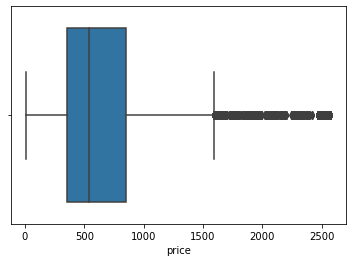

In [57]:
sns.boxplot (x = df_notebook['price']);

### **Assumption:** We will consider only those records as Notebooks whose prices are greater than 120, as this is the minimum price of notebooks in the market.

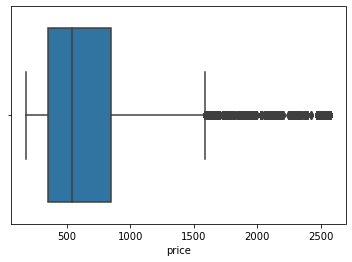

In [59]:
df_notebook= df_notebook[df_notebook['price']>120]
sns.boxplot (x = df_notebook['price']);

#### Number of values greater than the 99% of the data, as there are many values we will keep them.

In [60]:
df_notebook[df_notebook.price > df_notebook.price.quantile(0.99)]

,index,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,N0,N1,N2,N3,Time,DayOfMonth,Month,Year,Day,Hour,event_type_ID
288,3352434,2019-10-03 17:10:32,view,1304849,2053013558920217191,computers.notebook,acer,2552.93,539049229,computers,notebook,None,None,17:10:32,3,10,2019,Thursday,17,0
564,15788491,2019-10-12 21:59:21,view,1307449,2053013558920217191,computers.notebook,asus,2570.18,559623257,computers,notebook,None,None,21:59:21,12,10,2019,Saturday,21,0
792,9878711,2019-10-08 16:11:51,view,1307275,2053013558920217191,computers.notebook,msi,2574.04,519724443,computers,notebook,None,None,16:11:51,8,10,2019,Tuesday,16,0
895,12223400,2019-10-10 12:45:12,view,1307428,2053013558920217191,computers.notebook,lenovo,2522.33,517225256,computers,notebook,None,None,12:45:12,10,10,2019,Thursday,12,0
917,10995481,2019-10-09 13:27:02,view,1307449,2053013558920217191,computers.notebook,asus,2574.04,513172820,computers,notebook,None,None,13:27:02,9,10,2019,Wednesday,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156046,42413994,2019-10-31 20:42:13,view,1307449,2053013558920217191,computers.notebook,asus,2570.18,539358901,computers,notebook,None,None,20:42:13,31,10,2019,Thursday,20,0
156047,42414155,2019-10-31 20:42:40,view,1307449,2053013558920217191,computers.notebook,asus,2570.18,539358901,computers,notebook,None,None,20:42:40,31,10,2019,Thursday,20,0
156055,42417473,2019-10-31 20:51:59,view,1307449,2053013558920217191,computers.notebook,asus,2570.18,513285279,computers,notebook,None,None,20:51:59,31,10,2019,Thursday,20,0
156058,42417611,2019-10-31 20:52:22,view,1307449,2053013558920217191,computers.notebook,asus,2570.18,513285279,computers,notebook,None,None,20:52:22,31,10,2019,Thursday,20,0


## **ANALYSIS OF DATA - SOLD NOTEBOOKS.**

In [61]:
df_notebook_OCT_purchase= df_notebook[(df_notebook['event_type']=='purchase')].copy() 
df_notebook_OCT_purchase= df_notebook_OCT_purchase.drop(['index'],axis=1)

In [62]:
df_notebook_OCT_purchase

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,N0,N1,N2,N3,Time,DayOfMonth,Month,Year,Day,Hour,event_type_ID
5,2019-10-02 11:05:29,purchase,1306310,2053013558920217191,computers.notebook,apple,1352.67,514984136,computers,notebook,None,None,11:05:29,2,10,2019,Wednesday,11,2
122,2019-10-10 08:43:27,purchase,1307408,2053013558920217191,computers.notebook,acer,360.34,513731310,computers,notebook,None,None,08:43:27,10,10,2019,Thursday,8,2
124,2019-10-21 03:27:22,purchase,1306133,2053013558920217191,computers.notebook,xiaomi,1145.20,559469054,computers,notebook,None,None,03:27:22,21,10,2019,Monday,3,2
568,2019-10-26 11:48:36,purchase,1307073,2053013558920217191,computers.notebook,acer,682.10,564298425,computers,notebook,None,None,11:48:36,26,10,2019,Saturday,11,2
675,2019-10-26 19:05:54,purchase,1306016,2053013558920217191,computers.notebook,asus,421.89,537204995,computers,notebook,None,None,19:05:54,26,10,2019,Saturday,19,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155886,2019-10-31 17:53:31,purchase,1307073,2053013558920217191,computers.notebook,acer,682.09,552532395,computers,notebook,None,None,17:53:31,31,10,2019,Thursday,17,2
155983,2019-10-31 18:33:57,purchase,1306650,2053013558920217191,computers.notebook,acer,437.57,513999770,computers,notebook,None,None,18:33:57,31,10,2019,Thursday,18,2
156021,2019-10-31 19:58:58,purchase,1307073,2053013558920217191,computers.notebook,acer,682.09,512699299,computers,notebook,None,None,19:58:58,31,10,2019,Thursday,19,2
156107,2019-10-31 23:30:47,purchase,1304409,2053013558920217191,computers.notebook,apple,1402.87,562780507,computers,notebook,None,None,23:30:47,31,10,2019,Thursday,23,2


### **BEST-SELLING BRANDS.**

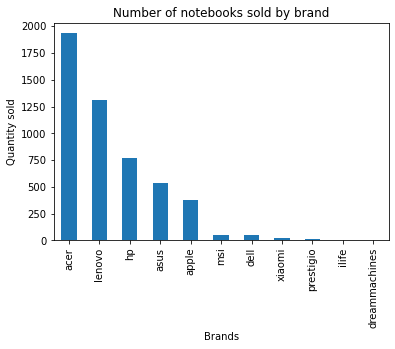

In [63]:
df_notebook_OCT_purchase['brand'].value_counts().plot.bar(ylabel='Quantity sold', xlabel='Brands', title='Number of notebooks sold by brand');

In [64]:
df_notebook_OCT_purchase.describe()

,product_id,category_id,price,user_id,DayOfMonth,Month,Year,Hour,event_type_ID
count,5075.00,5075.00,5075.00,5075.00,5075.00,5075.00,5075.00,5075.00,5075.00
mean,1306949.87,2053013558920217088.00,581.28,535105820.26,15.71,10.00,2019.00,10.33,2.00
std,568.72,0.00,401.26,18121623.66,8.49,0.00,0.00,4.89,0.00
min,1303355.00,2053013558920217088.00,180.11,502469352.00,1.00,10.00,2019.00,0.00,2.00
25%,1306797.00,2053013558920217088.00,290.59,516262862.50,8.00,10.00,2019.00,7.00,2.00
50%,1307074.00,2053013558920217088.00,437.57,533866348.00,16.00,10.00,2019.00,10.00,2.00
75%,1307310.00,2053013558920217088.00,694.97,552140443.00,23.00,10.00,2019.00,14.00,2.00
max,1307545.00,2053013558920217088.00,2574.04,566171268.00,31.00,10.00,2019.00,23.00,2.00


In [66]:
totalVendido= df_notebook_OCT_purchase['price'].sum()
print(f'Number of notebooks sold by brand ${totalVendido}')

Number of notebooks sold by brand $2949976.52


In [67]:
precioProductoMasCaroVendidoOCT = df_notebook_OCT_purchase['price'].max()

In [68]:
idDeMayorPrecioOCTVendido = df_notebook_OCT_purchase[df_notebook_OCT_purchase['price'] == df_notebook_OCT_purchase['price'].max()]
idDeMayorPrecioOCTVendido = int(idDeMayorPrecioOCTVendido['product_id'].to_string().split()[1])

In [70]:
print(f'The ID of the most expensive product sold in the month of October is {idDeMayorPrecioOCTVendido} with an amount of ${precioProductoMasCaroVendidoOCT}')

The ID of the most expensive product sold in the month of October is 1307275 with an amount of $2574.04


## Graph of the distribution of the price variable

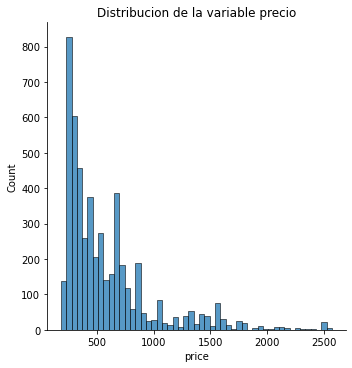

In [71]:
grafPrecio= sns.displot(data = df_notebook_OCT_purchase['price'])
grafPrecio.set(title="Distribucion de la variable precio");

### **DAYS WITH MOST SALES.**

In [72]:
ventasXdia = df_notebook_OCT_purchase['Day'].value_counts()
ventasXdia

Wednesday    806
Tuesday      768
Friday       749
Thursday     741
Monday       694
Saturday     660
Sunday       657
Name: Day, dtype: int64

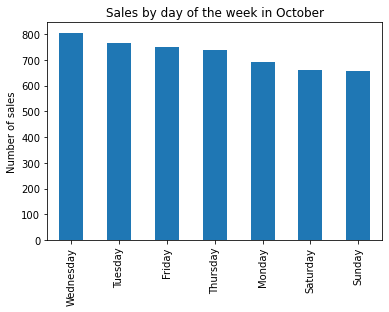

In [73]:
ventasXdia.plot.bar(title='Sales by day of the week in October', ylabel='Number of sales');

In [74]:
diaMasVentas, cantMasVentas = ventasXdia[ventasXdia == ventasXdia.max()].to_string().split()
print(f'The day with the highest number of sales was {diaMasVentas} with a total of {cantMasVentas} sales')

The day with the highest number of sales was Wednesday with a total of 806 sales


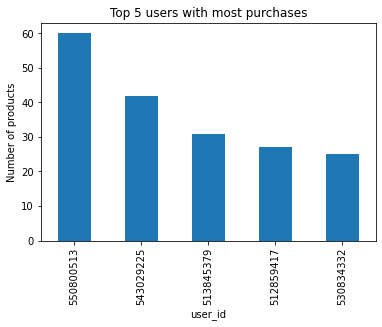

In [78]:
cantVentasPorUser= df_notebook_OCT_purchase.value_counts('user_id')[:5]
cantVentasPorUser.plot.bar(title='Top 5 users with most purchases', ylabel='Number of products');

In [77]:
uid_masVentas= cantVentasPorUser[0:1].to_string().split()[1]
cant_masVentas= cantVentasPorUser[0:1].to_string().split()[2]
print(f'The user {uid_masVentas} has the highest number of sales in the month of October ({cant_masVentas})')

The user 550800513 has the highest number of sales in the month of October (60)


### **HIGHEST REVENUE BY BRAND.**

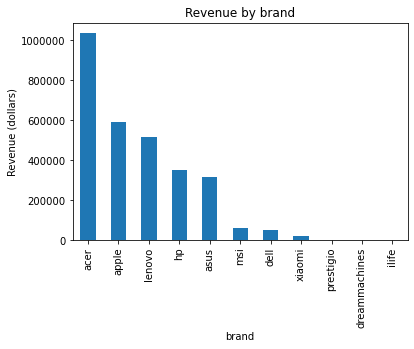

In [79]:
df_notebook_OCT_purchase.groupby(['brand'])['price'].sum().sort_values(ascending=False).plot.bar(title='Revenue by brand',ylabel='Revenue (dollars)')
plt.ticklabel_format(style="plain", axis="y");

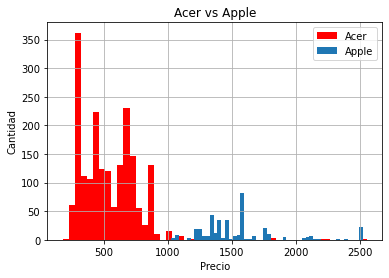

In [80]:
fig1=df_notebook_OCT_purchase[df_notebook_OCT_purchase['brand']=='acer']['price'].hist(bins=50,color="red")
fig2=df_notebook_OCT_purchase[df_notebook_OCT_purchase['brand']=='apple']['price'].hist(bins=50)
fig2.set_xlabel('Precio')
fig1.set_ylabel('Cantidad')
plt.title('Acer vs Apple')
plt.legend(('Acer', 'Apple'));

#### **ACER AND APPLE.**

In [81]:
recaudacion_oct_apple= int(df_notebook_OCT_purchase[df_notebook_OCT_purchase['brand']=='apple']['price'].sum())
cant_vendido_apple= (df_notebook_OCT_purchase[df_notebook_OCT_purchase['brand']=='apple'].count()[:1].to_list())[0]

cant_vendido_acer= (df_notebook_OCT_purchase[df_notebook_OCT_purchase['brand']=='acer'].count()[:1].to_list())[0]
recaudacion_oct_acer= int(df_notebook_OCT_purchase[df_notebook_OCT_purchase['brand']=='acer']['price'].sum())
print("ACER vs APPLE revenue comparison")
if recaudacion_oct_acer > recaudacion_oct_apple:
    print(f'Most of the revenue in october comes from ACER with a total sold of {cant_vendido_acer} units and revenue of ${recaudacion_oct_acer} while Apple sold a total of {cant_vendido_apple} units and revenue of ${recaudacion_oct_apple}')
else:
    print(f'Most of the revenue in october comes from APPLE with a total sold of {cant_vendido_apple} units and revenue of ${recaudacion_oct_apple} while Lenovo sold a total of {cant_vendido_lenovo}  units and revenue of ${recaudacion_oct_lenovo}')

ACER vs APPLE revenue comparison
Most of the revenue in october comes from ACER with a total sold of 1933 units and revenue of $1035811 while Apple sold a total of 378 units and revenue of $590782


### **TIME WITH HIGHEST SALES.**

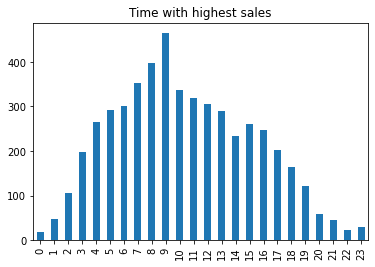

In [82]:
df_notebook_OCT_purchase['Hour'].value_counts().sort_index().plot.bar(title='Time with highest sales');

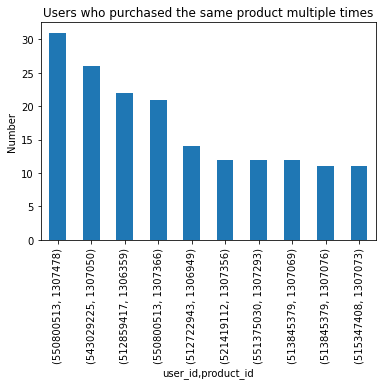

In [84]:
userXproduct_purchase = df_notebook_OCT_purchase[['user_id','product_id']].value_counts()
userXproduct_purchase[:10].plot.bar(title='Users who purchased the same product multiple times', ylabel= 'Number');

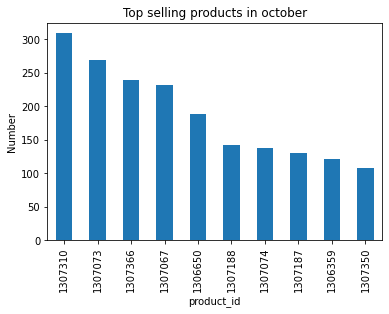

In [85]:
df_notebook_OCT_purchase['product_id'].value_counts()[:10].plot.bar(title='Top selling products in october',xlabel='product_id',ylabel='Number');

### **SALES THROUGHOUT THE MONTH.**

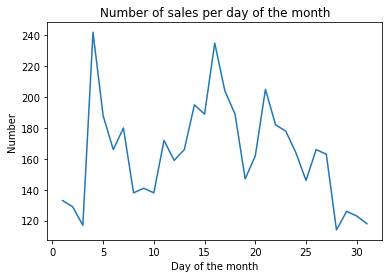

In [86]:
df_notebook_OCT_purchase['DayOfMonth'].value_counts().sort_index().plot(title='Number of sales per day of the month', ylabel='Number',xlabel='Day of the month');

## ** CREATING NEW COLUMNS: PURCHASE RATE.**

## Products with the highest purchase rate.

#### Step 1. Filter and create two new records.

In [87]:
cantCompraXProducto= df_notebook_OCT[df_notebook_OCT['event_type']=='purchase']['product_id'].value_counts()
cantVistasXProducto= df_notebook_OCT[df_notebook_OCT['event_type']=='view']['product_id'].value_counts().reset_index()

#### Step 2. Create tables and add the product_id that have no purchases to cantCompraXProducto.

In [88]:
tablaVistas = cantVistasXProducto.reset_index()
tablaCompra= cantCompraXProducto.reset_index()
tablaVistas['product_id'] = 0
tablaCompra= tablaCompra.append(tablaVistas)
cantCompraXProducto=tablaCompra

<ipython-input-88-312a2d5b7e41>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tablaCompra= tablaCompra.append(tablaVistas)


#### Step 3. Remove duplicates, keeping the original values and adding the product_ids with 0 purchases.

In [89]:
cantCompraXProducto= tablaCompra.drop_duplicates(['index'], keep='first')
cantCompraXProducto=cantCompraXProducto.drop(['level_0'],axis=1)

#### Step 4: Sort both tables.

In [90]:
cantCompraXProducto=cantCompraXProducto.sort_values(by='index')
cantVistasXProducto=cantVistasXProducto.sort_values(by='index')

#### tep 5. Rename both tables.

In [91]:
cantCompraXProducto= cantCompraXProducto.rename(columns={'index':'product_id',
                                   'product_id':'cantidadCompras'})
cantVistasXProducto= cantVistasXProducto.rename(columns={'index':'product_id',
                                   'product_id':'cantidadVistas'})

#### Step 6. Merge both tables into one.

In [93]:
tasaCompraXProducto= cantCompraXProducto.copy()
tasaCompraXProducto['cantidadVistas']= cantVistasXProducto['cantidadVistas']
tasaCompraXProducto['tasaCompra']=tasaCompraXProducto['cantidadCompras'] / tasaCompraXProducto['cantidadVistas']

In [94]:
for i in df_notebook_OCT_purchase.index:
    pid= df_notebook_OCT_purchase.loc[i, 'product_id'] 
    tasa= round(float(tasaCompraXProducto[tasaCompraXProducto['product_id']==pid]['tasaCompra'].values), 3)
    df_notebook_OCT_purchase.loc[i, 'tasaCompra']= tasa

#### Step 7. Order the table according to purchase rate values.

In [95]:
tasaCompraXProducto=tasaCompraXProducto.sort_values(by='tasaCompra',ascending=False)

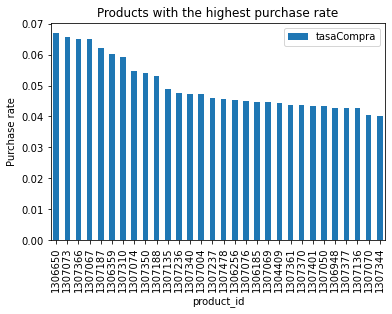

In [96]:
tablaGrafica = tasaCompraXProducto.set_index('product_id')
tablaGrafica=tablaGrafica.drop(['cantidadCompras','cantidadVistas'],axis=1)
tablaGrafica[:30].plot(kind='bar', title= 'Products with the highest purchase rate', ylabel='Purchase rate');

*We have found which are the product_ id of the Notebooks with the highest purchase rate.*

## Brands with the highest purchase rate.

In [98]:
marcasXEvent= df_notebook_OCT[(df_notebook_OCT['event_type']=='view') ^ (df_notebook_OCT['event_type']=='purchase')][['brand','event_type']].copy()
tablaTasa= marcasXEvent[['brand','event_type']].value_counts().reset_index()
tablaTasa.columns=['brand','event_type','cant'] #Rename columns
indiceDrop= tablaTasa[~tablaTasa['brand'].duplicated(keep=False)].index.to_list()
tablaTasa= tablaTasa.drop(indiceDrop, axis=0)
marcas= tablaTasa.drop_duplicates(subset=['brand'])['brand'].reset_index().drop(columns=['index'],axis=1)
marcas['tasaCompra']= 0
for indexTasa in tablaTasa.index.to_list():
    for indexMarca in marcas.index.to_list():
        brand= marcas.iloc[indexMarca].values[0]
        view= tablaTasa[(tablaTasa['brand']==brand) & (tablaTasa['event_type']=='view')]['cant'].values[0]
        purchase= tablaTasa[(tablaTasa['brand']==brand) & (tablaTasa['event_type']=='purchase')]['cant'].values[0]
        tasa= purchase/view
        marcas.iloc[indexMarca, 1]=tasa

In [99]:
marcas= marcas.sort_values(by='tasaCompra',ascending=False)

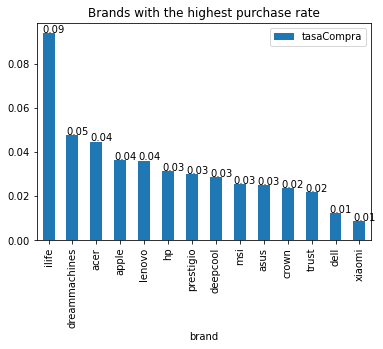

In [102]:
grafMarcasTasa= marcas.plot.bar(title= 'Brands with the highest purchase rate', x='brand',y='tasaCompra')
for p in grafMarcasTasa.patches:
    grafMarcasTasa.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.000, p.get_height() * 1.005));

In [103]:
tablaTasa= tablaGrafica.reset_index()
listaPidBr = df_notebook_OCT_purchase.drop_duplicates(subset=['product_id'])
listaPidBr = listaPidBr[['product_id','brand']]

In [104]:
num=0
for pid in tablaTasa['product_id'].values:
    for index in listaPidBr.index.to_list():
        if listaPidBr.loc[index, 'product_id'] == pid:
            marca=listaPidBr.loc[index, 'brand']
            tablaTasa.loc[num,'brand']= marca
        num+=1

In [105]:
tablaTasa

,product_id,tasaCompra,brand
0,1306650.00,0.07,NaN
1,1307073.00,0.07,NaN
2,1307366.00,0.07,NaN
3,1307067.00,0.06,NaN
4,1307187.00,0.06,NaN
...,...,...,...
194521,NaN,NaN,lenovo
195252,NaN,NaN,asus
195683,NaN,NaN,lenovo
196118,NaN,NaN,dreammachines


## Correlation analysis.

<ipython-input-106-4f37db3ef55f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_mat= df_notebook_OCT.corr()


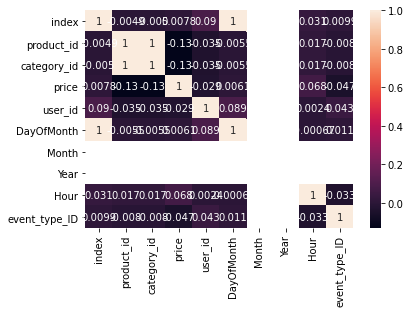

In [106]:
correlation_mat= df_notebook_OCT.corr()
sns.heatmap(correlation_mat, annot= True)
plt.show;

## SCATTERPLOT

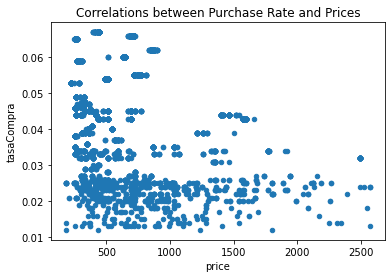

In [107]:
df_notebook_OCT_purchase.plot.scatter(title='Correlations between Purchase Rate and Prices',x='price',y='tasaCompra');

**A negative relationship is observed between the Purchase Rate and the price of notebooks**: At higher prices, notebooks exhibit lower purchase rates given the income restriction that every consumer presents.